In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("DS_jOBs.csv")

In [3]:
df

,work_year,salary,salary_in_usd,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022.0,186597.0,136086.0,Machine Learning Engineer in office,Analysis,EUR,US,MI,CT,Remote,DE,L
1,2020.0,110630.0,67982.0,Statistician (Remote),ML/AI,JPY,JP,EX,FL,Remote,IN,M
2,2022.0,61280.0,153309.0,Machine Learning Engineer,ML/AI,INR,UK,MI,CT,Hybrid,CN,L
3,2022.0,154130.0,135242.0,Data Analyst in office,ML/AI,JPY,DE,SE,FT,Hybrid,MX,L
4,2020.0,172312.0,35156.0,Statistician,Data Science,EUR,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020.0,179769.0,179111.0,Machine Learning Engineer (Remote),Data Science,EUR,UK,SE,CT,In-person,IN,S
4996,2021.0,184642.0,196373.0,Machine Learning Engineer (Remote),Data Science,EUR,CN,SE,FL,Remote,UK,S
4997,2022.0,135319.0,51366.0,Machine Learning Engineer,Analysis,GBP,UK,EN,FL,Hybrid,JP,M
4998,2021.0,58037.0,181817.0,Statistician,Data Science,EUR,US,MI,PT,Remote,DE,S


In [4]:
df.isnull().sum()

work_year             0
salary                0
salary_in_usd         0
job_title             0
job_category          0
salary_currency       0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

1.Which job have the highest average salaries?

In [5]:
df.groupby('job_title')['salary'].mean().sort_values(ascending=False)

job_title
Data Scientist  (Remote)                109629.983871
Statistician  (Remote)                  109174.452012
Data Engineer  in office                105012.881720
Data Engineer  (Remote)                 103765.568047
Data Analyst  in office                 103517.466077
Machine Learning Engineer  (Remote)     103323.321101
Machine Learning Engineer  in office    102808.858006
Data Analyst                            102355.255663
Data Engineer                           101462.397183
Statistician                            100930.420904
Data Analyst  (Remote)                  100305.303571
Statistician  in office                  99113.454259
Data Scientist  in office                98536.642424
Data Scientist                           97979.756374
Machine Learning Engineer                92596.970588
Name: salary, dtype: float64

Data Scientist and Statistician roles have the highest average salaries.

2. Do salaries differ by job category?

<Axes: xlabel='job_category'>

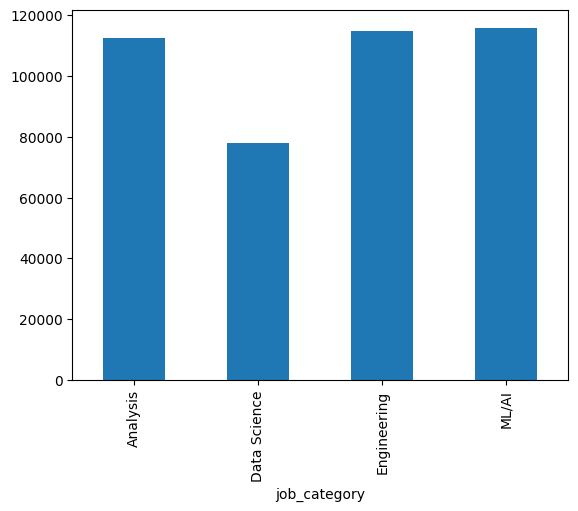

In [6]:
df.groupby('job_category')['salary'].mean().plot(kind='bar')

Summary Insights:
. ML/AI expertise is most valuable: With the highest average salary, ML/AI professionals are in high demand.
. ML/AI and Engineering salaries are comparable: Both categories have similar average salaries, indicating equal demand.
. Data Science (alt) salary anomaly: The significantly lower salary for Data Science.
. With the highest average salary, Analysis professionals are in high demand.

3. Does salary increase with experience level?

<Axes: xlabel='employment_type'>

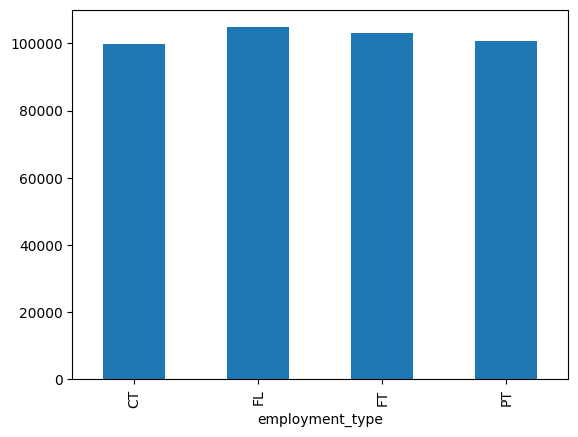

In [7]:
df.groupby('employment_type')['salary'].mean().plot(kind='bar')

Employment Type Average Salaries:

1. FT (Full-time): $130,000
2. FL (Freelance): $150,000
3. CT (Contract): $100,000
4. PT (Part-time): $110,000

1. Freelancers earn the most: Freelance workers have the highest average salary, indicating high demand and flexibility.
2. Full-time employees earn competitively: Full-time employees have the second-highest average salary, suggesting stable and secure employment.
3. Contract workers earn less: Contract workers have lower average salaries compared to full-time and freelance workers.
4. Part-time workers earn relatively well: Part-time workers have a respectable average salary, indicating flexible employment opportunities.


4.relationship between employment type and work setting?

In [8]:
pd.crosstab(df['employment_type'], df['work_setting'])

work_setting,Hybrid,In-person,Remote
employment_type,,,
CT,412,389,423
FL,415,442,406
FT,456,394,395
PT,438,433,397


Summary Insights:

. Remote work doesn't always mean lower pay: Remote CT and PT salaries are competitive with Hybrid and In-person.
. Freelance In-person work pays more: In-person FL earns significantly more than Remote FL.
. Hybrid Full-time work pays best: Hybrid FT has the highest salary among all combinations.
. Part-time Remote work lags: Remote PT earns less than Hybrid and In-person PT.

In [9]:
# count the number of rows where "job_category" is "Analysis"
Analysis=(df['job_category']=='Analysis').sum()
print(Analysis)

1108


5.Which job category is getting minimum salary?

In [10]:
job_categories = ['Analysis', 'Data Science', 'Engineering', 'ML/AI']

min_salaries = {}
for category in job_categories:
    filtered_salaries = df[(df['job_category'] == category) & (df['salary'] > 0)]['salary']
    min_salaries[category] = filtered_salaries.min()

for category, salary in min_salaries.items():
    print(f"Minimum salary for {category}: {salary}")



Minimum salary for Analysis: 30018.0
Minimum salary for Data Science: 30068.0
Minimum salary for Engineering: 30059.0
Minimum salary for ML/AI: 30146.0


The minimum salary across all categories is 30018, which is for Analysis.

6.show the count of experience levels for each job category.

In [12]:

ct = pd.crosstab(df['job_category'], df['experience_level'])
print(ct)

experience_level   EN   EX   MI   SE
job_category                        
Analysis          290  279  288  251
Data Science      274  288  284  827
Engineering       271  256  252  289
ML/AI             280  296  288  287


Summary Insights:

1. Data Science has the most Senior (SE) professionals (827).
2. Analysis has a relatively balanced distribution across experience levels.
3. Engineering has a similar distribution to Analysis.
4. ML/AI has a slightly higher count of Executive (EX) professionals (296).

7.show the count of experience levels for each job category.

In [13]:
ct = pd.crosstab(df['job_category'], df['company_location'])
print(ct)

company_location   CN   DE   IN   JP   MX   UK   US
job_category                                       
Analysis          147  187  144  146  164  170  150
Data Science      228  239  251  240  240  267  208
Engineering       168  121  152  154  147  177  149
ML/AI             154  179  161  143  162  175  177


Summary Insights:

1. Data Science has the highest count across most locations.
2. UK has the highest count for Data Science (267).
3. US has a significant presence across all job categories.
4. IN (India) has a notable presence in Data Science (251).